# Lotka-Volterra model
### Kirill Zakharov

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use("ggplot")

In [2]:
#Runge-Kutt method
def runge_Kutt(f, g, t0, x0, y0, h, b):
    t = t0
    x = x0
    y = y0
    arrayX = np.array([])
    arrayY = np.array([])
    arrayT = np.array([])
    while t<b:
        k1 = g(t, x, y)
        q1 = f(t, x, y)
        
        k2 = g(t + h/2, x + (h*q1)/2, y + (h*k1)/2)
        q2 = f(t + h/2, x + (h*q1)/2, y + (h*k1)/2)
        
        k3 = g(t + h/2, x + (h*q2)/2, y + (h*k2)/2)
        q3 = f(t + h/2, x + (h*q2)/2, y + (h*k2)/2)
        
        k4 = g(t + h, x + h*q3, y + h*k3)
        q4 = f(t + h, x + h*q3, y + h*k3)
        
        y = y + h*(k1 + 2*k2 + 2*k3 + k4)/6
        x = x + h*(q1 + 2*q2 + 2*q3 + q4)/6
        
        arrayX = np.append(arrayX, x)
        arrayT = np.append(arrayT, t)
        arrayY = np.append(arrayY, y)
        
        t += h
    return arrayT, arrayX, arrayY

In [3]:
a = 2.3 #коэффициент рождаемости жертв
b = 1.4 #коэффициент убыли жертв
c = 2.1 #коэффициент убыли хищников
d = 1.4 #коэффициент рождаемости хищников
def fx(t, x, y):
    return a*x - b*x*y

def fy(t, x, y):
    return -c*y + d*x*y

def fxl(t, x, y):
    return a*math.log(x) - b*math.log(x)*math.log(y)

def fyl(t, x, y):
    return -c*math.log(y) + d*math.log(x)*math.log(y)


p1, p2, p3 = runge_Kutt(fxl, fyl, 0, 10, 5, 0.01, 100)
print(f"Solution: x = {p2[-1]}, y = {p3[-1]}")

Solution: x = 9.878208015221917, y = 4.358616473183823


## Visualization

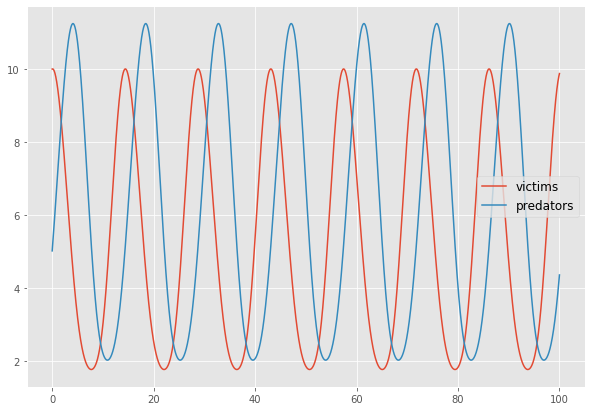

In [4]:
fig, ax = plt.subplots(figsize=(10,7))
n = len(p1)
t = np.linspace(0, 100, n)
plt.plot(t, p2, label="victims")
plt.plot(t, p3, label="predators")
plt.legend(prop={'size': 12})
plt.show()

In [5]:
period = 2*math.pi/math.sqrt(a*c)
period

2.8589483075657034

In [6]:
stationary_point = (c/d, a/b)
stationary_point

(1.5000000000000002, 1.6428571428571428)

In [7]:
p1, p2, p3 = runge_Kutt(fx, fy, 0, stationary_point[0], stationary_point[1], 0.01, 10)
print(p2[-1], p3[-1])

1.5000000000000002 1.6428571428571428


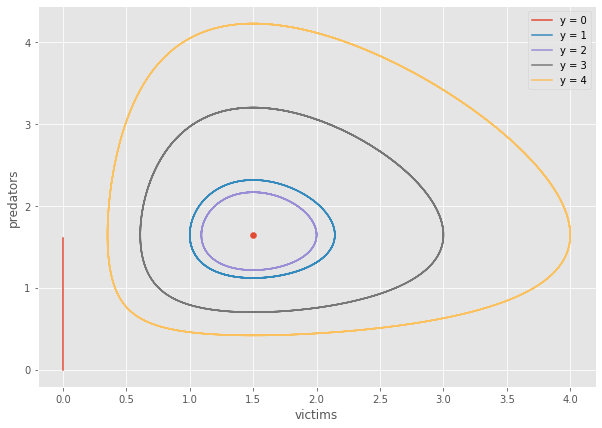

In [8]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_xlabel('victims')
ax.set_ylabel('predators')
plt.scatter(stationary_point[0], stationary_point[1])
for i in range(5):
    p1, p2, p3 = runge_Kutt(fx, fy, 0, i, stationary_point[1], 0.01, 10)
    plt.plot(p2, p3, label=f"y = {i}")
plt.legend()    
plt.show()